In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
file_path = '/content/consumer_electronics_sales_data.csv'
data = pd.read_csv(file_path)
print(data.head(10))

   ProductID ProductCategory  ProductBrand  ProductPrice  CustomerAge  \
0       5874     Smartphones  Other Brands    312.949668           18   
1       5875   Smart Watches       Samsung    980.389404           35   
2       5876         Tablets       Samsung   2606.718293           63   
3       5877     Smartphones       Samsung    870.395450           63   
4       5878         Tablets          Sony   1798.955875           57   
5       5879     Smartphones       Samsung    373.148325           37   
6       5880     Smartphones       Samsung   2330.036775           26   
7       5881     Smartphones            HP    780.101494           35   
8       5882         Laptops  Other Brands   2264.561583           19   
9       5883         Laptops            HP   1001.624006           66   

   CustomerGender  PurchaseFrequency  CustomerSatisfaction  PurchaseIntent  
0               0                  2                     1               0  
1               1                  7      

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             9000 non-null   int64  
 1   ProductCategory       9000 non-null   object 
 2   ProductBrand          9000 non-null   object 
 3   ProductPrice          9000 non-null   float64
 4   CustomerAge           9000 non-null   int64  
 5   CustomerGender        9000 non-null   int64  
 6   PurchaseFrequency     9000 non-null   int64  
 7   CustomerSatisfaction  9000 non-null   int64  
 8   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 632.9+ KB


In [5]:
data.describe()

,ProductID,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,10373.500000,1527.429195,43.347000,0.508889,10.054667,2.996000,0.566444
std,2598.220545,829.900898,15.055084,0.499949,5.461328,1.405301,0.495593
min,5874.000000,100.376358,18.000000,0.000000,1.000000,1.000000,0.000000
25%,8123.750000,809.165014,30.000000,0.000000,5.000000,2.000000,0.000000
50%,10373.500000,1513.024577,43.000000,1.000000,10.000000,3.000000,1.000000
75%,12623.250000,2244.415520,56.000000,1.000000,15.000000,4.000000,1.000000
max,14873.000000,2999.852253,69.000000,1.000000,19.000000,5.000000,1.000000


In [6]:
data.isnull().sum()

ProductID               0
ProductCategory         0
ProductBrand            0
ProductPrice            0
CustomerAge             0
CustomerGender          0
PurchaseFrequency       0
CustomerSatisfaction    0
PurchaseIntent          0
dtype: int64

In [7]:
product_category = data['ProductCategory'].value_counts()
print(product_category)

ProductCategory
Laptops          1842
Smartphones      1841
Smart Watches    1810
Tablets          1769
Headphones       1738
Name: count, dtype: int64


<ipython-input-8-1baf84e99fc2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='ProductCategory', order=data['ProductCategory'].value_counts().index, palette="viridis")


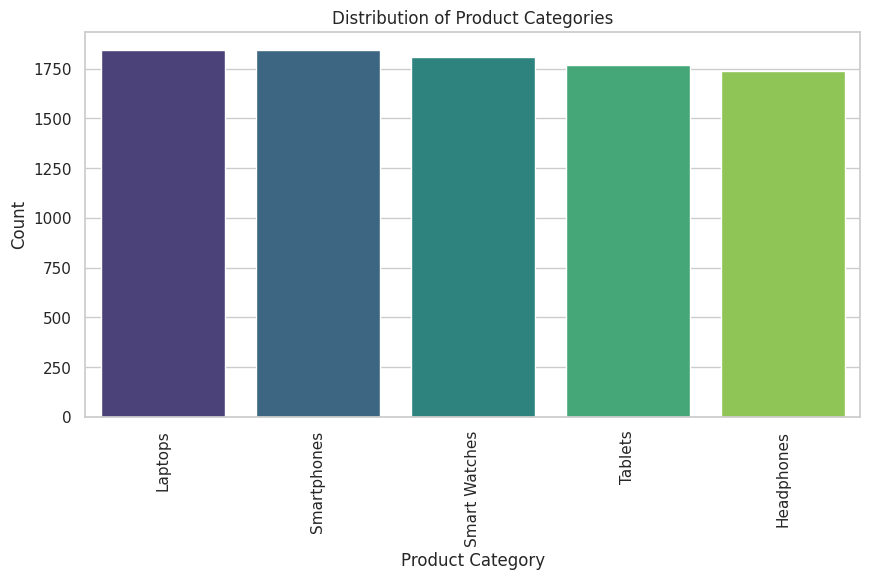

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='ProductCategory', order=data['ProductCategory'].value_counts().index, palette="viridis")
plt.title('Distribution of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [9]:
df = data['CustomerAge']
print(df.head(10))

0    18
1    35
2    63
3    63
4    57
5    37
6    26
7    35
8    19
9    66
Name: CustomerAge, dtype: int64


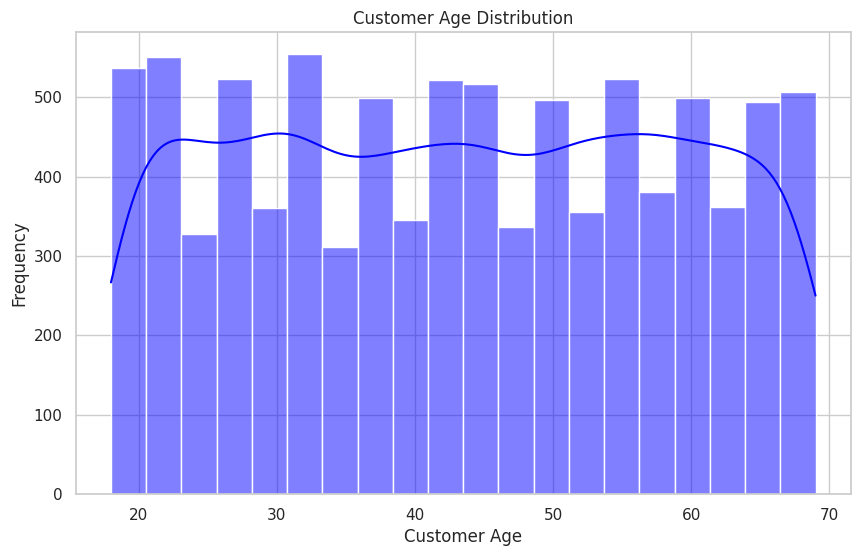

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df, bins=20, kde=True, color='blue')
plt.title('Customer Age Distribution')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

In [11]:
x = data['PurchaseFrequency']
y = data['CustomerSatisfaction']

fig = px.scatter(data, x='PurchaseFrequency', y='CustomerSatisfaction', color='CustomerGender',
                 title='Purchase Frequency vs. Customer Satisfaction')
fig.update_layout(
    xaxis_title="Purchase Frequency",
    yaxis_title="Customer Satisfaction",
    legend_title="Customer Gender"
)
fig.show()

In [12]:
fig = px.histogram(data, x='CustomerGender', color='PurchaseIntent', barmode='group',
                       title='Gender-wise Purchase Intent')
fig.update_layout(
        xaxis_title="Customer Gender",
        yaxis_title="Count",
        legend_title="Purchase Intent")
fig.show()